## week3授業前課題2 住宅情報の分析

### 1.このテキストについて

#### テキストの目的
・データ分析の基本的な流れを知る  
・データ分析ライブラリのPandasに慣れる  
・KaggleのNotebooksを利用する  

#### どのように学ぶか
定番のデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

### 2.エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

### 3.KaggleのNotebooks

Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。  
良いEDAをたくさん見て、ノウハウを吸収していきましょう。  
  
今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。  
これ以降Kaggleを利用していきますので、アカウントを作成してください。

《参考Notebooks》

<Comprehensive data exploration with Python | Kaggle（まずはここから）>  
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

<House Prices : EDA to ML (Beginner) | Kaggle>  
https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner

<A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle>  
https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos

### 4.データセットの準備

#### 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [670]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [671]:
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

#### 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、  
どのようなデータセットかを説明してください。

・不動産販売に直接関連する80個の変数を持つ（不動産を購入する際に、購入者が知りたいと思うような情報）  
・変数は例えば、販売価格、敷地面積、建物形状など不動産の基本情報から、内部設備や品質など細部の情報まで様々  

#### 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

・各特徴量がどういったものかを見る。（数値データか文字データなど）  
・今回の目的変数はどの列か確認する。  
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### ・各特徴量の確認

・trainデータのinfo()の出力  
・目的変数は、81列目のSalePrice
・データ数は各列1460ずつ、ブランクデータのある列が確認できる

In [672]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [673]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


#### 【問題4】欠損値への対応

欠損値に関して以下のことを行い、レポートしてください。  

各特徴量の欠損値の有無を確認する。  

欠損値の確認にはmissingnoというライブラリを活用しましょう。  
このライブラリにより欠損値の有無が可視化できます。  
インストールや使い方に関しては以下のページをご覧ください。  

#### 欠損値がある列の欠損数と欠損率を一つにまとめる

In [674]:
pd.options.display.float_format = '{:.1f}%'.format

missing_d = train.isnull().sum()[train.isnull().sum()>0].sort_values()

missing_df = pd.DataFrame({'欠損数':missing_d,
                             '欠損率':missing_d/len(train)*100
                            })

missing_data

,欠損数,欠損率
Electrical,1,0.1%
MasVnrType,8,0.5%
MasVnrArea,8,0.5%
BsmtQual,37,2.5%
BsmtCond,37,2.5%
BsmtFinType1,37,2.5%
BsmtExposure,38,2.6%
BsmtFinType2,38,2.6%
GarageCond,81,5.5%
GarageQual,81,5.5%


In [675]:
# 欠損のある列名を取得
missing_df.T.columns

# 欠損を持つ列のデータ型を確認
train[missing_df.T.columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Electrical    1459 non-null   object 
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   GarageCond    1379 non-null   object 
 9   GarageQual    1379 non-null   object 
 10  GarageFinish  1379 non-null   object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  LotFrontage   1201 non-null   float64
 14  FireplaceQu   770 non-null    object 
 15  Fence         281 non-null    object 
 16  Alley         91 non-null     object 
 17  MiscFeature   54 non-null     object 
 18  PoolQC        7 non-null    

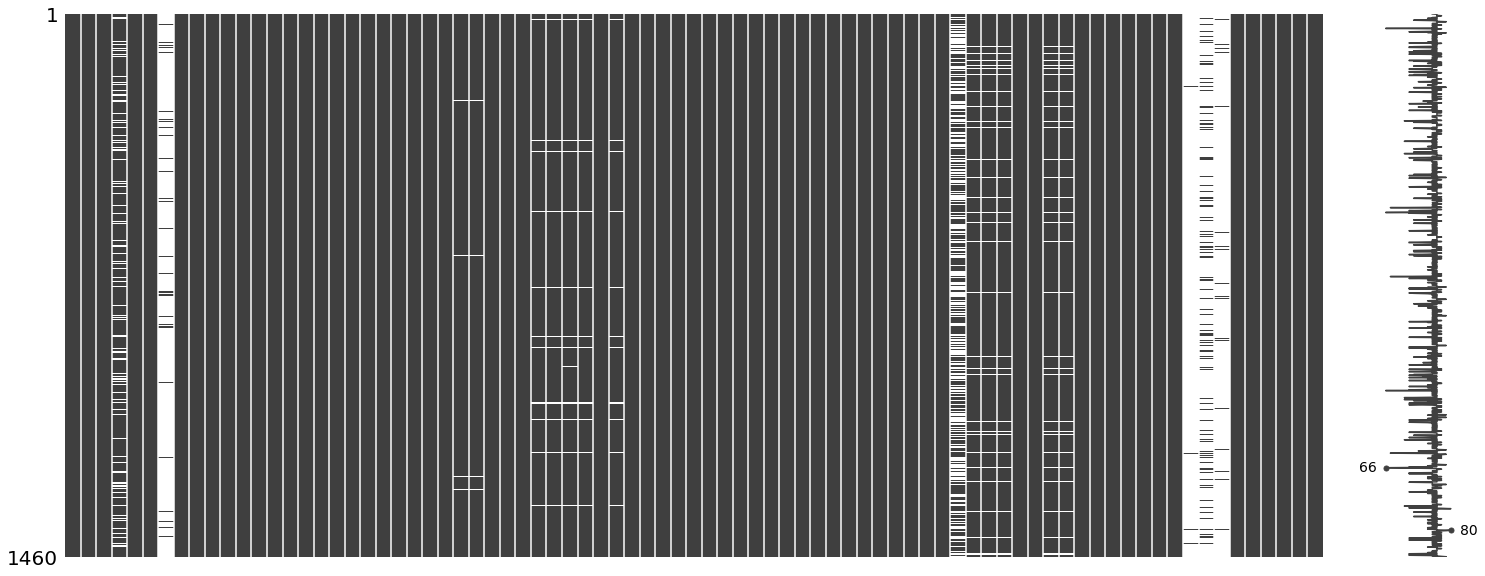

In [676]:
import missingno as msn

msn.matrix(train)
plt.show()

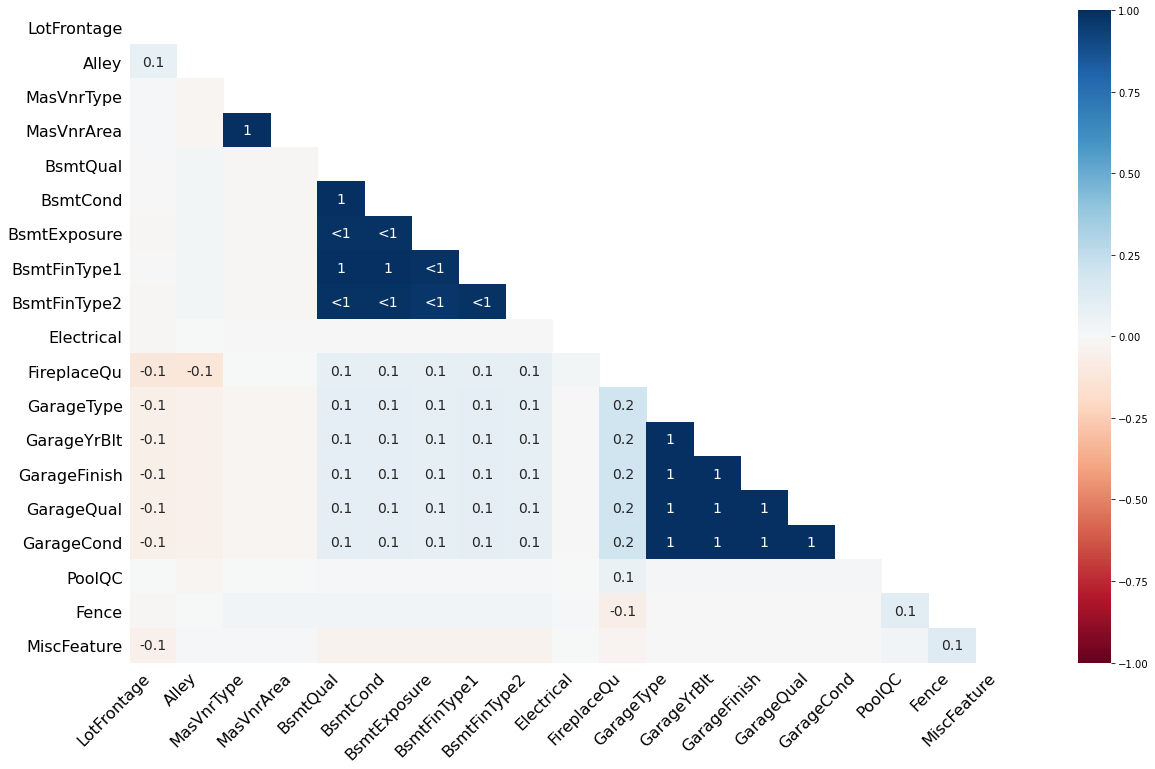

In [677]:
msn.heatmap(train)
plt.show()

#### ・5つ以上欠損値がある特徴量（列）は削除する。

In [678]:
deleate_df = pd.DataFrame(train.isnull().sum()[train.isnull().sum()>=5].sort_values())

In [679]:
train_dropped = train.drop(deleate_df.T.columns,axis=1)

In [680]:
train_dropped.isnull().sum()[train.isnull().sum()>0]

Electrical    1
dtype: int64

#### ・欠損値があるサンプル（行）は削除する。

欠損値がある行を特定する

In [681]:
train_dropped[train_dropped1['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


再度、確認

In [682]:
train_dropped.loc[1379,'Electrical']

nan

In [683]:
train_dropped = pd.DataFrame(train_dropped.drop(train_dropped.index[1379]))

欠損データの削除後を確認。1460×81列から1459行×63列になっており、non-nullが全て1459であることを確認。

In [684]:
train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

### 6.目的変数

#### 【問題5】用語の調査
以下の単語の意味を確認。  
  
・尖度（せんど/Kurtosis）
確率変数の確率密度関数や頻度分布の鋭さを表す指標。     
正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾をもった分布であり、  
尖度が小さければより丸みがかったピークと短く細い尾をもつ分布である。
  
  
・歪度（わいど/skewness）  
分布の非対称性を示す指標。  
歪度が正のとき、右裾が長いことや、右に歪んだ、もしくは左に偏った分布であり、
歪度が負のとき、左裾が長いことや、左に歪んだ、もしくは右に偏った分布である。

#### 【問題6】分布の確認
・seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。  
・目的変数に対して対数変換を行う。  
・対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。　　

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。  
このように加工することで予測時の精度を上げることができます。


/Users/kazuki/.pyenv/versions/anaconda3-2020.02/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


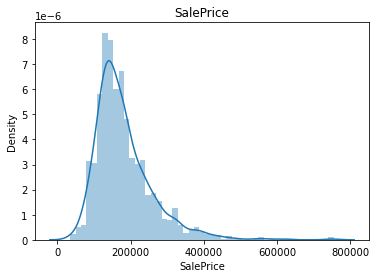

In [685]:
feature = 'SalePrice'

fig = plt.figure()
ax = fig.add_subplot() 
ax = sns.distplot(train_dropped[feature])

#ax = sns.histplot(train_dropped[feature])
#ax = sns.rugplot(train_dropped[feature])
#ax = sns.kdeplot(train_dropped[feature])
plt.title(feature)
plt.show()

In [686]:
print('Skewness : {:.2f}'.format(train_dropped[feature].skew()))
print("Kurtosis : {:.2f}".format(train_dropped[feature].kurt()))

Skewness : 1.88
Kurtosis : 6.53


目的変数を対数変換し、再度、尖度と歪度を算出してみる

In [687]:
pd.options.display.float_format = '{:.2f}'.format

saleprice_log = np.log(train_dropped[feature])

print('Skewness : {:.2f}'.format(saleprice_log.skew()))
print("Kurtosis : {:.2f}".format(saleprice_log.kurt()))

Skewness : 0.12
Kurtosis : 0.81


/Users/kazuki/.pyenv/versions/anaconda3-2020.02/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


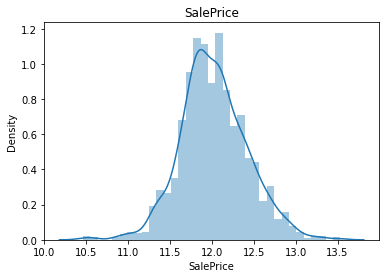

In [688]:
feature = 'SalePrice'

fig = plt.figure()
ax = fig.add_subplot() 
ax = sns.distplot(saleprice_log)

#ax = sns.histplot(train_dropped[feature])
#ax = sns.rugplot(train_dropped[feature])
#ax = sns.kdeplot(train_dropped[feature])
plt.title(feature)
plt.show()

＜考察＞  
対数変換前のデータは、0（左）に偏った分布だったが、対数変換後は、偏りが解消され正規分布の形に近くなった。

### 7.特徴量

#### 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。  
  
・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。  
・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。  
・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。  
・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
  
《補足》  
  
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。  
このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

### ・相関係数行列のヒートマップ作成

In [689]:
LogPrice = pd.DataFrame(saleprice_log)
Log = LogPrice.rename(columns={'SalePrice':'Log'})
print(Log)



       Log
0    12.25
1    12.11
2    12.32
3    11.85
4    12.43
...    ...
1455 12.07
1456 12.25
1457 12.49
1458 11.86
1459 11.90

[1459 rows x 1 columns]


In [690]:
train_log = pd.concat([train_dropped,Log],axis=1)
print(train_log)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  \
0       AllPub    Inside       Gtl  ...         0           0

### ・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

・'pearson': ピアソンの積率相関係数（デフォルト）  
・'kendall': ケンドールの順位相関係数  
・'spearman': スピアマンの順位相関係数

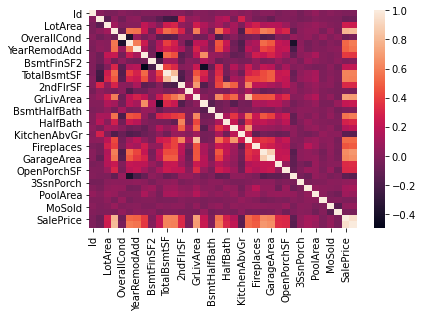

In [719]:
corr = train_log.corr()

sns.heatmap(corr)
plt.show()

In [720]:
corr_sorted = corr['SalePrice'].sort_values(ascending=False)
corr_sorted.head(12)

SalePrice      1.00
Log            0.95
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

In [721]:
top10 = ['OverallQual',
         'GrLivArea',
         'GarageCars',
         'GarageArea',
         'TotalBsmtSF',
         '1stFlrSF',
         'FullBath',
         'TotRmsAbvGrd',
         'YearBuilt',
         'YearRemodAdd']

train_top10 = train_log[top10]
corr_top10 = train_top10.corr()
print(corr_top10)

              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual          1.00       0.59        0.60        0.56         0.54   
GrLivArea            0.59       1.00        0.47        0.47         0.46   
GarageCars           0.60       0.47        1.00        0.88         0.44   
GarageArea           0.56       0.47        0.88        1.00         0.49   
TotalBsmtSF          0.54       0.46        0.44        0.49         1.00   
1stFlrSF             0.48       0.57        0.44        0.49         0.82   
FullBath             0.55       0.63        0.47        0.41         0.32   
TotRmsAbvGrd         0.43       0.83        0.36        0.34         0.29   
YearBuilt            0.57       0.20        0.54        0.48         0.39   
YearRemodAdd         0.55       0.29        0.42        0.37         0.29   

              1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
OverallQual       0.48      0.55          0.43       0.57          0.55  
GrLi

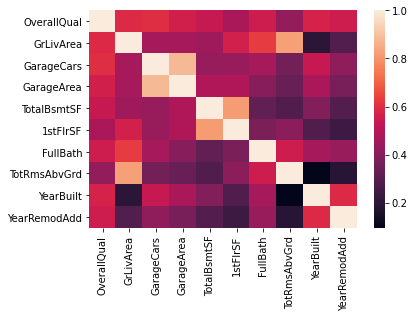

In [703]:
sns.heatmap(corr_top10)
plt.show()

### ・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

・OverallQual: 家の全体的な素材や仕上がりを評価
　　　(評価点)
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
・GrLivArea: 地上の居住面積（平方フィート）
・GarageCars: 車の収容可能台数で表す車庫の大きさ
・GarageArea: 車庫の大きさ（平方フィート）
・TotalBsmtSF：地下室の面積の合計（平方フィート）
・1stFlrSF：1階面積（平方フィート）
・FullBath: フルバス（グレード）ルームの数
・TotRmsAbvGrd: グレード以上の部屋数（バスルームは含まない）
・YearBuilt: 建設年月日
・YearRemodAdd: リフォーム日（リフォームや増改築がない場合は工事日と同じ）

### ・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

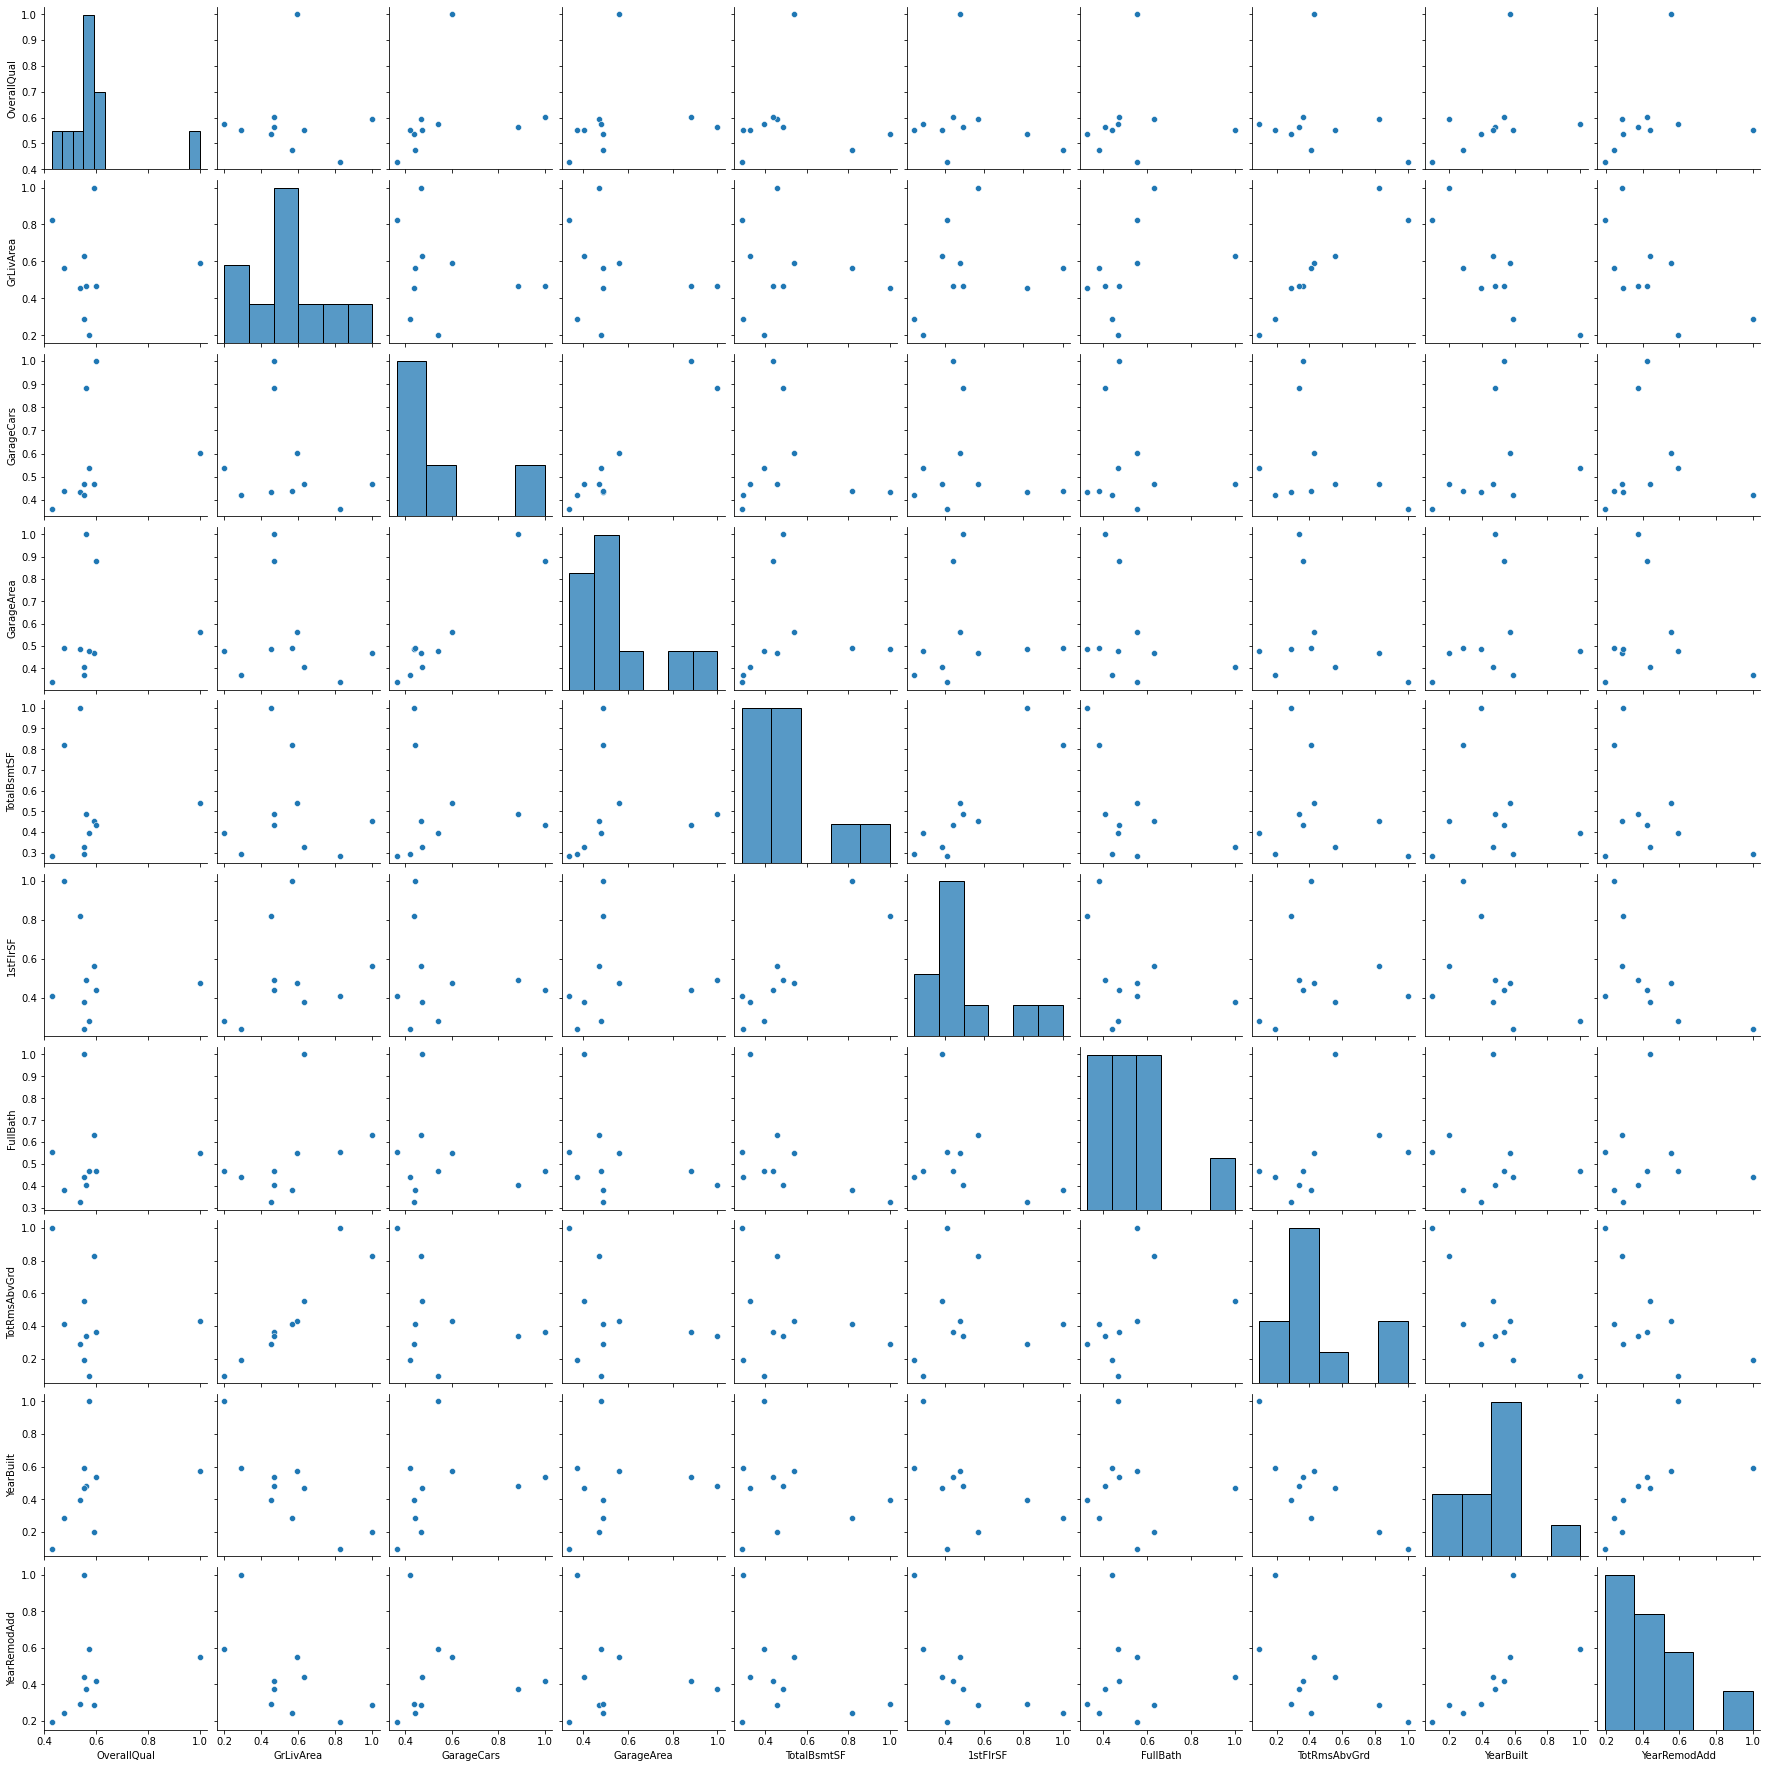

In [713]:
sns.pairplot(corr_top10)
plt.show()

In [733]:
corr_top10_sorted = corr_top10.unstack()
corr_top10_sorted.sort_values(ascending=False).head(20)

YearRemodAdd  YearRemodAdd   1.00
YearBuilt     YearBuilt      1.00
GrLivArea     GrLivArea      1.00
GarageCars    GarageCars     1.00
GarageArea    GarageArea     1.00
TotalBsmtSF   TotalBsmtSF    1.00
1stFlrSF      1stFlrSF       1.00
FullBath      FullBath       1.00
TotRmsAbvGrd  TotRmsAbvGrd   1.00
OverallQual   OverallQual    1.00
GarageCars    GarageArea     0.88
GarageArea    GarageCars     0.88
TotRmsAbvGrd  GrLivArea      0.83
GrLivArea     TotRmsAbvGrd   0.83
TotalBsmtSF   1stFlrSF       0.82
1stFlrSF      TotalBsmtSF    0.82
GrLivArea     FullBath       0.63
FullBath      GrLivArea      0.63
OverallQual   GarageCars     0.60
GarageCars    OverallQual    0.60
dtype: float64

特徴量の中でお互いの相関係数が高い組み合わせ（相関係数）
・GarageCars - GarageArea（0.88）
・TotRmsAbvGrd - GrLivArea (0.83)
・TotalBsmtSF - 1stFlrSF (0.82)

《補足》

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

＜考察＞
・不動産の販売価格は、1階、車庫の面積など不動産の広さと、築年数などの品質面が影響していそう。